In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('ENB2012_data.csv')

In [3]:
x=df.iloc[:,0:8]
y=df.iloc[:,8:]

In [4]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
y_scaled=scale.fit_transform(y)    

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [6]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

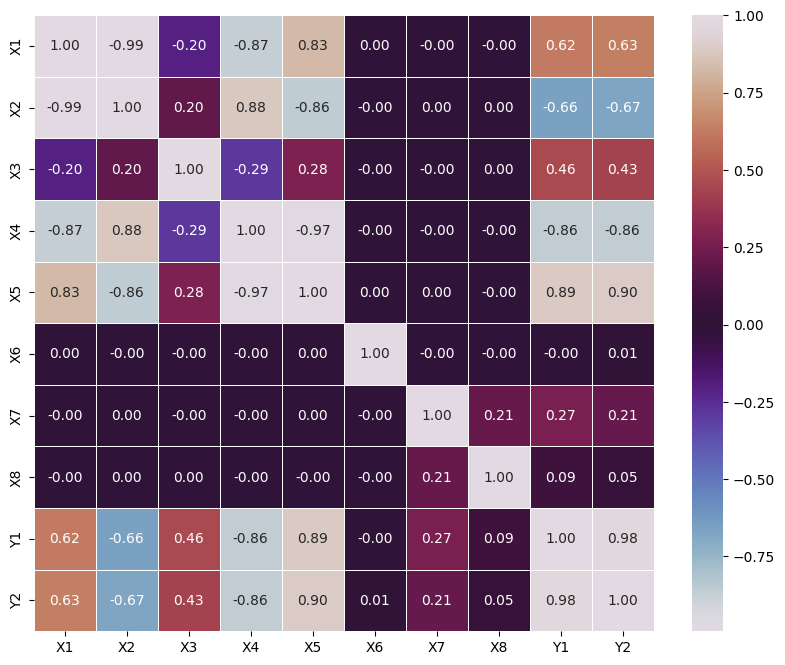

In [27]:
from sklearn.neural_network import MLPRegressor
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='twilight',fmt=".2f",linewidth=0.5)
plt.show()

In [8]:
df.shape

(768, 10)

In [9]:
mlp_model=MLPRegressor(hidden_layer_sizes=(128)
                        ,activation='relu'
                        ,solver='adam'
                        ,max_iter=1000
                        ,random_state=0
                        ,verbose=True)  

In [10]:
mlp_model.fit(x_train,y_train)

Iteration 1, loss = 313.31869209
Iteration 2, loss = 309.78383753
Iteration 3, loss = 306.22403126
Iteration 4, loss = 302.61741310
Iteration 5, loss = 298.97093980
Iteration 6, loss = 295.26860441
Iteration 7, loss = 291.45835504
Iteration 8, loss = 287.58208394
Iteration 9, loss = 283.48560763
Iteration 10, loss = 279.32034711
Iteration 11, loss = 274.87272895
Iteration 12, loss = 270.27429164
Iteration 13, loss = 265.50291819
Iteration 14, loss = 260.45088252
Iteration 15, loss = 255.29339524
Iteration 16, loss = 250.02937881
Iteration 17, loss = 244.43783144
Iteration 18, loss = 238.74345461
Iteration 19, loss = 232.75779325
Iteration 20, loss = 226.62881293
Iteration 21, loss = 220.33604601
Iteration 22, loss = 213.74940627
Iteration 23, loss = 207.23809696
Iteration 24, loss = 200.31931589
Iteration 25, loss = 193.40253622
Iteration 26, loss = 186.30272160
Iteration 27, loss = 179.16041731
Iteration 28, loss = 172.06311729
Iteration 29, loss = 164.96584503
Iteration 30, loss = 15

c:\Users\BHAV KORAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=128, max_iter=1000, random_state=0,
             verbose=True)

In [11]:
y_pred=mlp_model.predict(x_test)

In [12]:
import sklearn.metrics as mt
acc=mt.mean_squared_error(y_test,y_pred)

In [13]:
print(f'metrics:{acc}')

metrics:4.098464038544785


In [14]:
#apply hyper tunning for this model
from sklearn.model_selection import GridSearchCV


In [15]:
param_grid={'hidden_layer_sizes':[(128,128),(128,128,128),(128,128,128,128)]
            ,'activation':['relu','tanh','logistic']
            ,'solver':['adam','sgd']
            ,'max_iter':[1000,2000,3000]
            ,'random_state':[0]}
mlp_model=MLPRegressor()
grid=GridSearchCV(mlp_model,param_grid,verbose=2,n_jobs=-1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(128, 128), (128, 128, 128),
                                                (128, 128, 128, 128)],
                         'max_iter': [1000, 2000, 3000], 'random_state': [0],
                         'solver': ['adam', 'sgd']},
             verbose=2)

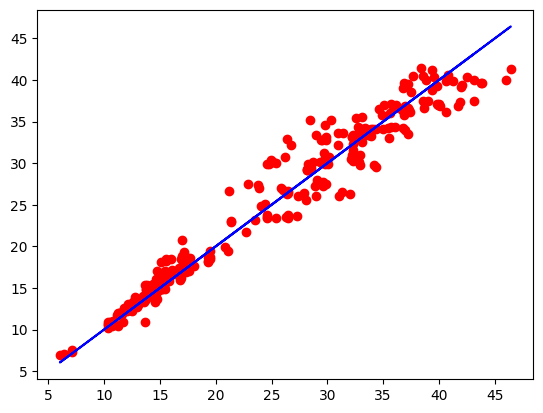

In [16]:
#visuaalize the result
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

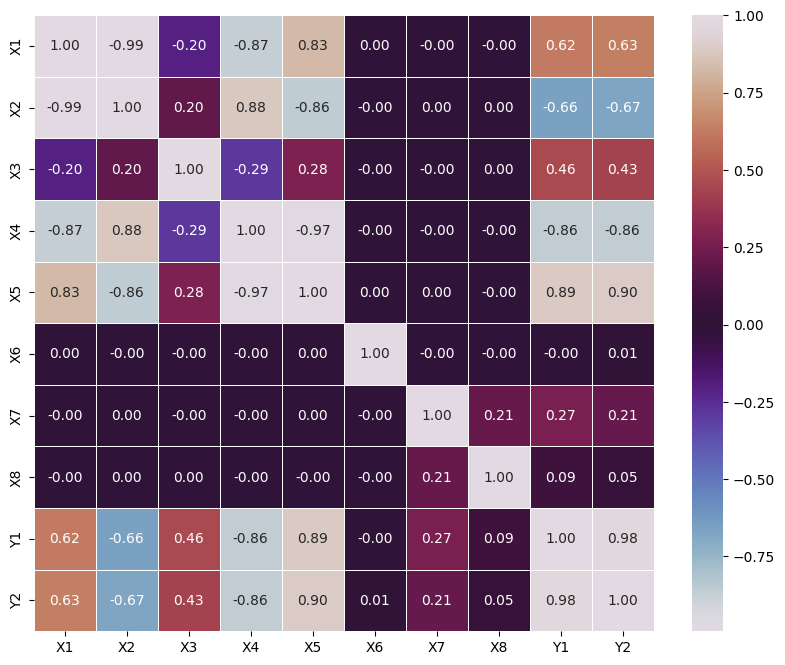